<a href="https://colab.research.google.com/github/shahzaibkhanniazi-dot/Smart_Crop_Recommendation_System/blob/main/Week1_Data_Preprocessing_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Note: Once it says "Mounted at /content/drive", you are ready!

Mounted at /content/drive


In [3]:
# Cell 2: Loading the Dataset
import pandas as pd

file_path = '/content/drive/MyDrive/MSAI_Crop_Project/Crop_recommendation.csv'

#For Reading the CSV file
df = pd.read_csv(file_path)

# Showing the first 5 rows to confirm it worked
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


--- Data Statistics ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


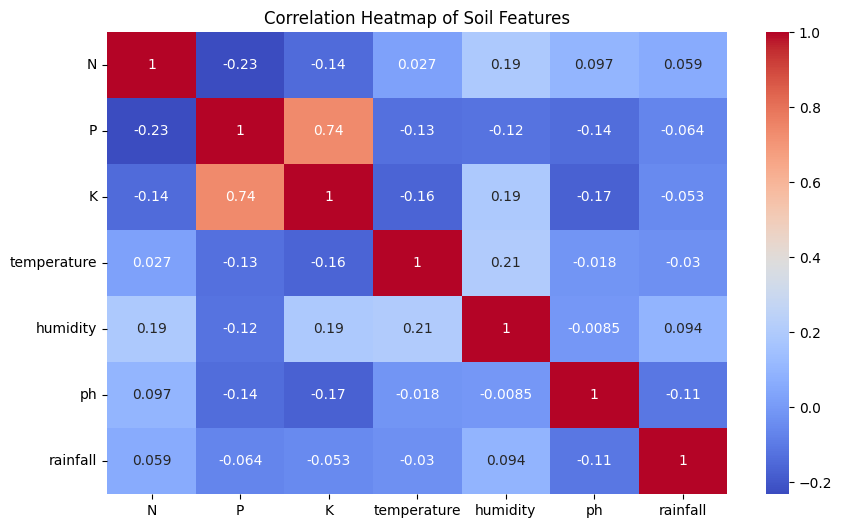

In [6]:
# Cell 3: Data Visualization (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Checking statistics
print("--- Data Statistics ---")
print(df.describe())

# 2. Creating a Correlation Matrix (Only for numeric columns)
# This shows how features like Rainfall and Humidity are related
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Soil Features")
plt.show()

In [7]:
# Cell 4: Splitting Data for Training and Testing
from sklearn.model_selection import train_test_split

# Defining Features (X) and Target (y)
X = df.drop('label', axis=1)  # The input numbers (N, P, K, etc.)
y = df['label']               # The answer (Rice, Maize, etc.)

# Splitting: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Verifying the split worked
print("\nFirst 3 rows of Training Data:")
display(X_train.head(3))

Training Data Shape: (1760, 7)
Testing Data Shape: (440, 7)

First 3 rows of Training Data:


,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
